# Techniques de simulation et Monte Carlo

## Introduction

La simulation c'est :

* se donner une loi de probabilité (ex: la loi exponentielle),
* puis inventer une technique pour simuler des v.a indépendantes $X_0,X_1,X_2,...$ suivant cette loi.

Cela sert à :

* calculer des intégrales: c'est la méthode de Monte Carlo (on expliquera),
* reproduire des phénomènes naturels,
* créer des situations "génériques" pour initialiser des algorithmes (notamment les algo de deep-learning),
* et des techniques avancées de simulation permettent même de résoudre des E.D.P.

Les techniques de simulation sont nombreuses, nous présentons ici les plus simples: les lois que nous choisirons seront des lois usuelles sur $\mathbb R^n$. Des techniques plus sophistiquées permettent de simuler des lois sur des espaces de grande dimension.

In [ ]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
plt.style.use("default")
import scipy.stats as stats

On part toujours du postulat que les ordinateurs savent simuler des v.a uniformes sur $[0,1]$ à l'aide de leur générateur aléatoire (pseudo-aléatoire):


In [ ]:
A=np.random.rand(2,3)
print(A)

In [ ]:
#perso je préfère
A=np.random.uniform(0,1,size=[2,3])
print(A)

## Lois discrètes

On veut tirer des entiers aléatoires pouvant prendre les valeurs `0,1,2,3` avec comme probabilités respectives `0.2,0.1,0.5,0.2`. On utilise la technique intuitive: on considère l'intervalle continu `[0,1]` que l'on partage en 4 segments de longeurs  `0.2,0.1,0.5,0.2`. On lance un réel aléatoire `U` dans `[0,1]` avec la fonction `random()` et l'on observe dans quel segment `U` est tombé. Pour trouver les séparations entre les intervalles, on utilise la fonction `np.cumsum()`.

### cas fini

In [ ]:
"""probas"""
p=[0.2,0.1,0.5,0.2]

"""on cherche dans quel intervalle tombe U"""
def simul_disc(p):
    cdf=np.cumsum(p) # sur l'exemple -> [0.2 0.3 0.8 1. ]
    U=np.random.random()
    i=0
    while U>cdf[i]:
        i+=1
    return i

""" on simule un échantillon de nos v.a discrètes"""
simus=[]
for i in range(500):
    simus.append(simul_disc(p))
"""on dresse l'histogramme"""
bins=[-0.5,0.5,1.5,2.5,3.5]
plt.hist(simus,bins=bins,edgecolor="k");

In [ ]:
#technique avec une fonction toute prête
simus=np.random.choice(a=[0,1,2,3],p=[0.2,0.1,0.5,0.2],size=100)
plt.hist(simus,bins=bins,edgecolor="k");

### Cas infini $\triangleright$

***À vous :***
Utilisez $(1\heartsuit)$ cette technique pour simuler une loi géométrique (oui c'est possible). Vérifiez $(1\heartsuit)$ le résultat en superposant votre histogramme avec la densité discrète donnée ci-dessous.


In [ ]:
x=np.arange(10)
pmf=stats.geom.pmf(x,p=0.5)
plt.plot(x,pmf,'o');

### ♡♡♡♡

La simulation de la loi géométrique est plus délicate, car elle ne prend pas un nombre fini de valeurs. On ne peut donc pas préparer le vecteur `cdf` en amont pour le parcourir ensuite, mais on peut <font color="red"> □ □ □ </font> au fur et à mesure de la boucle `while` :

In [ ]:
def simul_geom(p):
    i = 0
    cdfi = 0
    U = np.random.random()
    ...


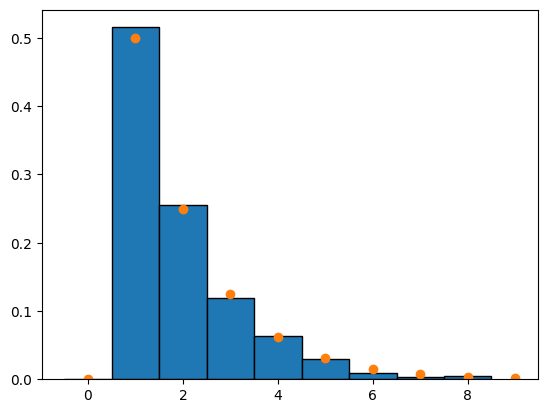

In [ ]:
#--- To keep following outputs, do not run this cell! ---

## Inversion d'une fonction de répartition inversible




### Théorie

Considérons un intervalle $[a,b]$. Éventuellement $a$ ou $b$ peuvent être infinis. Considérons une loi $\mu$ sur cet intervalle, dont la fonction de répartition est $F$:
$$
        \mu([a,x]) = F(x)
$$
On aimerait simuler une v.a ayant cette loi. Supposons dans un premier temps que $F$ est continue et strictement croissante sur $[a,b]$, ce qui revient à dire que  la loi $\mu$ n'a pas d'atome (=ne charge pas les singletons) et charge tout $[a,b]$. On peut dans ce cas définir l'inverse $F^{-1} :[0,1]\to [a,b]$ qui vérifie
$$
        F \circ F^{-1}(x) = F^{-1} \circ F(x) = x
$$
mais aussi
$$
  F^{-1} (u) \leq x \quad \Leftrightarrow  \quad  u \leq F(x)
$$
 Prenons   $U$ une v.a de loi uniforme sur $[0,1]$ et définissons $X := F^{-1} (U)$. On a:
$$
       \mathbf P[X \leq x] = \mathbf P[ F^{-1} (U) \leq  x] = \mathbf P[U \leq F(x)] = F(x)
$$
Ceci étant vrai pour tout $x$, la v.a $X$ a bien pour loi $\mu$.

### Loi exponentielle

Utilisons la technique de l'inversion de la fonction de répartition pour simuler des v.a de loi Exponentielle(scale = $\mu$ = $\frac{1}{\lambda}$).

***À vous:***
Vérifiez $(2\heartsuit)$ à l'aide d'un calcul que le programme suivant utilise bien l'inverse de la fonction de répartition de la loi exponentielle (ou peut-être que ce n'est pas vraiment le cas).

In [ ]:
U=np.random.random(size=1000)
mu=0.5
X=-mu*np.log(U)
plt.hist(X,density=True,edgecolor="k")

x=np.linspace(0,4,200)
plt.plot(x,np.exp(-x/mu)/mu);

#### ♡♡



La loi exponentielle de paramètre $\lambda$ a pour paramètre d'échelle $\mu = \frac{1}{\lambda}$, et pour fonction de répartition la fonction $F(x) = 1 - e^{-x/\mu}$. Donc
$$
F^{-1}(y) = \( - \mu\ln(1-y),\)
$$
définie sur $[0,1[$.
La méthode d'inversion de la fonction de répartition indique donc de poser
$$
X =\( -\mu\ln(1-U),\)
$$ avec $U$ de loi uniforme sur $[0,1[$, ou encore de loi uniforme sur $[0,1]$ (c'est la même loi).
Mais comme ...

### Loi de Weibull

***A vous:***  Appliquez  la technique de l'inversion de la fonction de répartition pour simuler des v.a de loi Weibull, dont la  fonction de répartition est donnée par
$$
    F(x) =  1 - e^{- x ^ \alpha},
$$
où $\alpha>0$ est un paramètre "de forme". Dressez  l'histogramme de vos simulations, que vous pouvez superposer avec la densité théorique que vous calculerez à la main.



Vous pouvez aussi comparer vos simulations avec celles de `numpy` ci-dessous:

In [ ]:
X1=np.random.weibull(0.7,size=2000)
X3=np.random.weibull(2,size=2000)
bins=np.linspace(0,10,50)
plt.hist(X1,bins=bins,density=True);
plt.hist(X3,bins=bins,density=True,alpha=0.5);#ici alpha c'est la transparence

***A vous:*** Remplacez `bins=bins` par `bins=50`. Quelle méthode permet le mieux de visualiser simultanément les deux distributions $(1\heartsuit)$ ?


#### ♡♡♡

La fonction de répartition de la loi de Weibull est donnée par
$$
    F(x) =  1 - e^{- x ^ \alpha},
$$
et son inverse est donc ...





 ***Corrolaire:*** $R$ suit une loi de Weibull de paramètres de forme $\alpha=2$ et de paramètre d'échelle $\sqrt{2}$  équivaut   à dire que $R^2$ suit une loi exponentielle de paramètre d'échelle $2$.

 Démonstration: On peut simuler $R$ par
 $$
 \sqrt{2} |\log(U)|^{1\over 2}
 $$
 En le mettant au carré on tombe sur la loi exponentielle de paramètre d'échelle 2

In [ ]:
def simul_weibull(size, alpha):
    U = np.random.random(size=size)
    return ...


In [ ]:
alphas = [0.7, 2]
m = 1000
n = len(alphas)
simul = [simul_weibull(m, a) for a in alphas]

for i, a in enumerate(alphas):
    plt.subplot(n,1,i+1)
    plt.ylim(0,1)
    plt.hist(simul[i], bins=20, density=True)
    x=np.linspace(0.01, simul[i].max(), 200)
    plt.plot(x, a*x**(a-1)*np.exp(-x**a),
             label=fr"$\alpha$={a}")
    plt.legend()

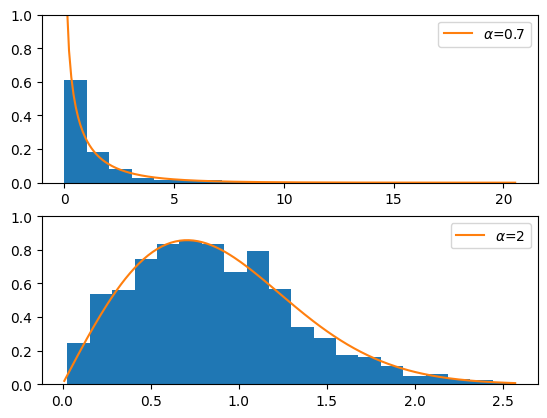

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### Loi de Weibull et durée de vie résiduelle

La loi Weilbull est une généralisation de la loi exponentielle. Notons $X$ la durée de vie d'un animal, que nous modélisons par une v.a de loi exponentielle. L'animal en question a la propriété de ne pas vieillir (détaillez $(1\heartsuit)$ le calcul ci-dessous):
$$
        \mathbf P[X >s+t / X > t  ]   =\mathbf  P[X>s]     \qquad         (*)
$$
Par exemple :  quand l'animal a 10 ans, la probabilité qu'il vive 5 années supplémentaires
est égale  à la probabilité de dépasser les 5 ans après sa naissance. Par ailleurs, pour toute variable aléatoire positive, on a
$$
          \mathbf   E[Y]=\int_0^\infty \mathbf  P[Y>x] dx
$$
(Démontrez $(2\heartsuit)$ en utilisant Fubbini). Ainsi la propriété de non-vieillissement donne :
$$
      \mathbf  E[X-t / X>t] =\mathbf  E[X]        \qquad                    (* *)
$$
On dit que l'espérance de vie "résiduelle" est la même à tout âge.


Maintenant, supposons que $X$ suive une loi de Weibull. Indiquez $(3\heartsuit)$  ce que deviennent les égalités $(*)$ et $(* *)$ ?
Ces lois sont souvent utilisées pour modéliser des durées de vie; mais la vie de qui, de quoi $(1\heartsuit)$?

Aide :
différenciez les cas $\alpha<1$ et $\alpha>1$.
Vous pouvez utiliser les mots clefs  :

* sous additif : $f(a+b)\leq f(a)+f(b)$
* sur additif :  $f(a+b)  \geq f(a)+f(b)$


#### ♡♡♡♡♡



## Inversion d'un fonction de répartition non-inversible


### inverse généralisé

La méthode "par inversion de la fonction de répartition" fonctionne aussi quand $F$ n'est pas bijective.
Personnellement, je définis alors $F^{-1}$ graphiquement, par symétrie, comme dans le graphique ci-dessous.

* supposons que $F$ soit définie sur $[A,B]$ (et à valeur dans $[0,1]$ of course) alors $F^{-1}$ va de $[0,1]$ dans $[A,B]$
* les sauts de $F$ deviennent des plateaux de $F^{-1}$ et vice versa.
* pour définir précisément la valeur $F^{-1}(x)$ quand $x$ est un saut, il faut décider si on met cette valeur en haut ou en bas du saut. Ce choix arbitraire n'a aucune importance sur nos simulations.

In [ ]:
"""une fonction de répartition d'une loi portée par [0,3]"""
x=np.array([0,0.5,1.5,2,2,3])
y=np.array([0,2,2,3,5,10])/10

fig,ax=plt.subplots()
ax.plot(x,y,label="F")
ax.plot(y,x,label=r"$F^{-1}$")
ax.set_aspect("equal")
ax.plot(np.linspace(0,3,20),np.linspace(0,3,20),".")
ax.legend();

Cet inverse généralisé n'est plus vraiment un inverse, mais il vérifie toujours:
$$
  F^{-1} (u) \leq x \quad \Leftrightarrow  \quad  u \leq F(x)
$$
Et c'est bien là l'essentiel, n'est-ce pas ?


***Remarque:***  On définit proprement l'inverse généralisé comme ceci :
$$
        F^{-1} (u) = \inf \{y : F(y)>u\}
$$

***À vous:*** Expliquez $(2\heartsuit)$ le lien entre la méthode de simulation des v.a discrètes du début et la méthode d'inversion de la fonction de répartition. Voyez-vous un lien entre l'algorithme du début et la formule ci-dessus ?

#### ♡♡



### Application

***À vous:*** programmez et tracez  l'inverse généralisé de  
$$
F(x)=\frac 1 6   \big( x 1_{[0,1[} + 1_{[1,2[} + 2 x 1_{[2,3[} + 6\!\times\!1_{[3,\infty[} \big)
$$
Simulez un échantillon de v.a suivant la loi déterminée par $F$.

Pour vous aider, voici comment on peut tracer une fonction continue par morceaux. D'abord sans numpy, puis avec numpy (plus complexe).

In [ ]:
""" l'argument x de f doit être un scalaire """
def f(x):
    if 0<=x<1 :
        return x/6
    elif 1<=x<2 :
        return 1/6
    elif 2<=x<3:
        return 2*x/6
    else:
        return 1


xs=np.linspace(0,4,200)
ys=[]
for x in xs :
    ys.append(f(x))
plt.plot(xs,ys)
plt.xticks([0,1,2,3]);

In [ ]:
"""l'argument de f_np est un tenseur numpy.
Cela va plus vite car on utilise une boucle implicite"""

def f_np(x):
    y=np.concatenate([
      x[(0<=x) & (x<1)],
      np.ones_like(x[(1<=x) & (x<2)]),
      2*x[(2<=x) & (x<3)],
      6*np.ones_like(x[3<=x])
    ])
    return y/6

xs=np.linspace(0,4,200)
ys=f_np(xs)
plt.plot(xs,ys)
plt.xticks([0,1,2,3]);

#### ♡♡♡♡

Simulons la loi de fonction de répartition
$$
F(x)=\frac 1 6   \big( x 1_{[0,1[} + 1_{[1,2[} + 2 x 1_{[2,3[} + 6\!\times\!1_{[3,\infty[} \big).
$$

L'inverse généralisé de cette fonction de répartition est:

In [ ]:
def f_inv(x):


Vérifions la symétrie entre ces deux fonctions:

In [ ]:
x = np.linspace(0, 3, 200)
y = f_np(x)
plt.plot(x, y, label=r"$F$")

x = np.linspace(0, 1, 200)
y = f_inv(x)
plt.plot(x, y, label=r"$F^{-1}$")

plt.plot(np.linspace(0,3,20),np.linspace(0,3,20),".")
plt.axis("equal")
plt.legend();

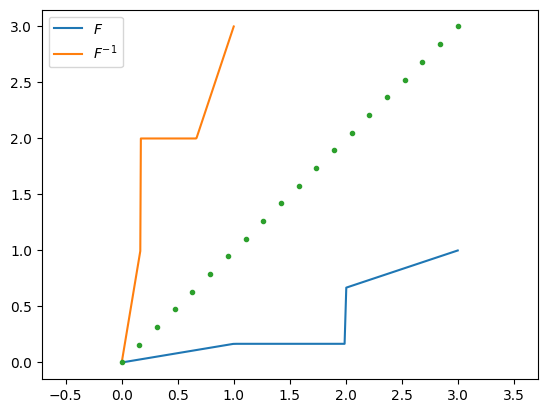

In [ ]:
#--- To keep following outputs, do not run this cell! ---

On peut maintenant utiliser la méthode d'inversion de la fonction de répartition pour nos simulations:

In [ ]:
U = np.random.random(size=1000)
X=

bins = np.arange(0, 3.2, 0.2)
plt.hist(X, bins=bins, edgecolor="k", density=True);

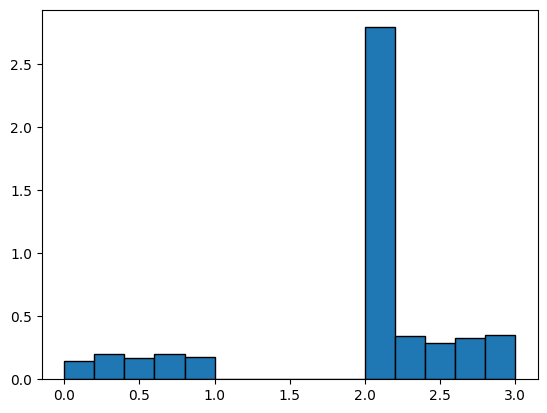

In [ ]:
#--- To keep following outputs, do not run this cell! ---